<a href="https://colab.research.google.com/github/ZohanaZuthi/Machine_Learning_Algorithm_Udemy/blob/main/Kernal_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kernel PCA (KPCA) – Nonlinear Principal Component Analysis
What is Kernel PCA?
Kernel PCA (KPCA) is an extension of Principal Component Analysis (PCA) that allows for nonlinear dimensionality reduction. Traditional PCA is limited to linear transformations, but Kernel PCA uses kernel functions to capture nonlinear relationships in the data.


How Does Kernel PCA Work?
KPCA follows the same idea as PCA but applies the kernel trick to project data into a higher-dimensional feature space where it becomes linearly separable.

Steps in Kernel PCA:
Choose a Kernel Function

Maps data into a higher-dimensional space.
Common kernels:
Linear Kernel: Equivalent to standard PCA.
Polynomial Kernel: Captures polynomial relationships.
RBF (Gaussian) Kernel: Captures complex nonlinear structures.
Compute the Kernel Matrix (K)

Instead of computing covariance in the original space, KPCA computes similarities in the transformed space.
Perform Eigen Decomposition

Compute eigenvalues and eigenvectors of the kernel matrix.
Select Top Principal Components

Choose the most significant eigenvectors.
Transform Data to Lower Dimensions

Project original data onto these new components.


## Importing the Features

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing Dataset**

In [22]:
dataset=pd.read_csv('Wine.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## **Splitting Dataset**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## **Feature Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## **Applying LDA**

In [25]:
from sklearn.decomposition import KernelPCA
kp=KernelPCA(n_components=2,kernel='rbf')
# generally it is 2

X_train=kp.fit_transform(X_train)
X_test=kp.transform(X_test)

## **Training with logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


LogisticRegression(random_state=0)

## **Making the confusion Matrix**

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

## **Visualising the Training Set**

<ipython-input-28-dcbaaf9cb35d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


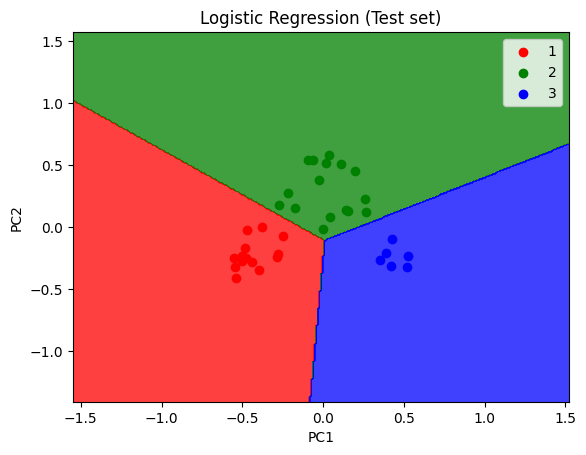

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()